In [1]:
from astroquery.mast import Observations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

In [24]:
import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir
%matplotlib inline

In [17]:
# sector_num = '36'
sector_num = '10'

print('Querying for PATHOS Sector ' + sector_num + " Observations...")
obsTable = Observations.query_criteria(provenance_name = "PATHOS"
                                       , sequence_number = sector_num
                                        #, target_name = '0936441397' 
                                      )
print("Found a total of " + str(len(obsTable)) + " PATHOS targets.")

# print('Downloading data products for these observations...')
# for obs in obsTable:
#     data_products = Observations.get_product_list(obs)
#     Observations.download_products(data_products)

Querying for PATHOS Sector 10 Observations...
Found a total of 31873 PATHOS targets.


In [18]:
np.where(obsTable['target_name'] == '936441397')

(array([18597]),)

In [19]:
# obsTable[25371]
# obsTable[24419]
obsTable[18597] # Sector 10

dataproduct_type,calib_level,obs_collection,obs_id,target_name,s_ra,s_dec,t_min,t_max,t_exptime,wavelength_region,filters,em_min,em_max,target_classification,obs_title,t_obs_release,instrument_name,proposal_pi,proposal_id,proposal_type,project,sequence_number,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
str10,int64,str4,str60,str9,float64,float64,float64,float64,float64,str7,str4,float64,float64,str1,str1,float64,str10,str18,str3,str1,str4,int64,str6,str48,str93,str88,str6,bool,float64,str7,str8,str9
timeseries,4,HLSP,hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc,936441397,162.3084327227382,-53.31805698878464,58568.95227465918,58595.16035380587,1800.0,Optical,TESS,600.0,1000.0,--,--,59239.69578694,Photometer,Domenico Nardiello,N/A,--,TESS,10,PATHOS,CIRCLE ICRS 162.30843272 -53.31805699 0.00412500,mast:HLSP/pathos/s0010/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_mast-prev.png,mast:HLSP/pathos/s0010/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc.fits,PUBLIC,False,nan,science,54156148,143751940


In [8]:
# data_products = Observations.get_product_list(obsTable[25371])
# Observations.download_products(data_products)

INFO: Found cached file ./mastDownload/HLSP/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_mast-prev.png with expected size 32801. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc.fits with expected size 152640. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc.txt with expected size 372741. [astroquery.query]


Local Path,Status,Message,URL
str151,str8,object,object
./mastDownload/HLSP/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_mast-prev.png,COMPLETE,None,None
./mastDownload/HLSP/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc.fits,COMPLETE,None,None
./mastDownload/HLSP/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc.txt,COMPLETE,None,None


SKY_LOCAL RAW MEAN+ 1 sigma: 6495.203 e/s
SKY_LOCAL RAW MEAN+ 2 sigma: 12052.615 e/s
SKY_LOCAL RAW MEAN+ 3 sigma: 17610.027 e/s
SKY_LOCAL RAW MEAN+ 4 sigma: 23167.439 e/s
SKY_LOCAL CLEAN mean+ 1 sigma: 139.299 e/s
SKY_LOCAL CLEAN mean+ 2 sigma: 141.920 e/s
SKY_LOCAL CLEAN mean+ 3 sigma: 144.541 e/s
SKY_LOCAL CLEAN mean+ 4 sigma: 147.163 e/s


(1568.0, 1596.0)

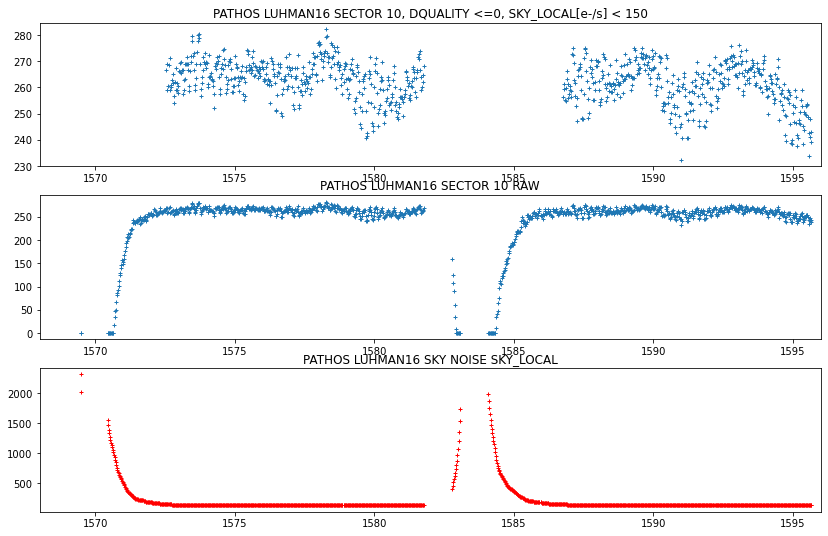

In [26]:
headers = 'TIME[d] TIMECORR[d] PSF_FLUX_RAW[e-/s] PSF_FLUX_COR[e-/s] AP1_FLUX_RAW[e-/s] AP1_FLUX_COR[e-/s] AP2_FLUX_RAW[e-/s] AP2_FLUX_COR[e-/s] AP3_FLUX_RAW[e-/s] AP3_FLUX_COR[e-/s] AP4_FLUX_RAW[e-/s] AP4_FLUX_COR[e-/s] SKY_LOCAL[e-/s] X_POSITION[pixel] Y_POSITION[pixel] DQUALITY '.split(' ')
path = '~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/mastDownload/HLSP/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc/hlsp_pathos_tess_lightcurve_tic-0936441397-s0010_tess_v1_llc.txt'
data = pd.read_csv(path, names=headers[:-1], skiprows=27, sep='\s+')
data_clean= data[data['DQUALITY'] <=0]

xr = data_clean['TIME[d]']
yr = data_clean['PSF_FLUX_COR[e-/s]']
skyNoise = data_clean['SKY_LOCAL[e-/s]']

data_clean = data_clean[data_clean['SKY_LOCAL[e-/s]'] < 150]
mean = np.mean(data['SKY_LOCAL[e-/s]'])
std = np.std(data['SKY_LOCAL[e-/s]'])
for i in np.arange(4):
    print('SKY_LOCAL RAW MEAN+ %i sigma: %.3f e/s'%(i+1, mean + (i+1)*std) )

mean = np.mean(data_clean['SKY_LOCAL[e-/s]'])
std = np.std(data_clean['SKY_LOCAL[e-/s]'])
for i in np.arange(4):
    print('SKY_LOCAL CLEAN mean+ %i sigma: %.3f e/s'%(i+1, mean + (i+1)*std) )
    
x1 = data_clean['TIME[d]']
y1 = data_clean['PSF_FLUX_COR[e-/s]']

plt.figure(figsize=(14,9))
plt.subplot(3,1,1), plt.title('PATHOS LUHMAN16 SECTOR 10, DQUALITY <=0, SKY_LOCAL[e-/s] < 150')
plt.plot(x1,y1,ls='', marker='+', ms=4)
plt.xlim([1568, 1596])

plt.subplot(3,1,2), plt.title('PATHOS LUHMAN16 SECTOR 10 RAW')
plt.plot(xr,yr,ls='', marker='+', ms=4)
plt.xlim([1568, 1596])

plt.subplot(3,1,3), plt.title('PATHOS LUHMAN16 SKY NOISE SKY_LOCAL')
plt.plot(xr, skyNoise, ls='', marker='+', ms=4, c='r')
plt.xlim([1568, 1596])

In [27]:
search_result = lk.search_tesscut('Luhman 16')
print(search_result)

SearchResult containing 3 data products.

 #     mission     year  author exptime target_name distance
                                   s                 arcsec 
--- -------------- ---- ------- ------- ----------- --------
  0 TESS Sector 10 2019 TESScut    1426   Luhman 16      0.0
  1 TESS Sector 36 2021 TESScut     475   Luhman 16      0.0
  2 TESS Sector 37 2021 TESScut     475   Luhman 16      0.0


<AxesSubplot:title={'center':'Target ID: Luhman 16, Cadence: 100'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

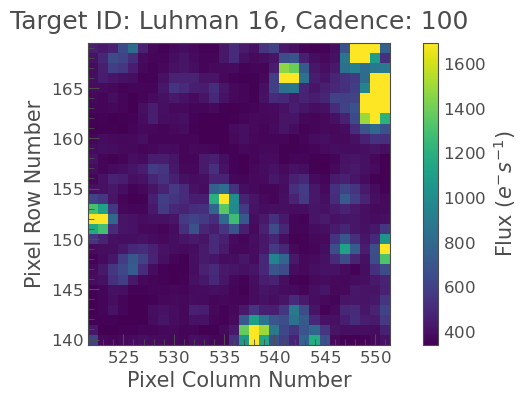

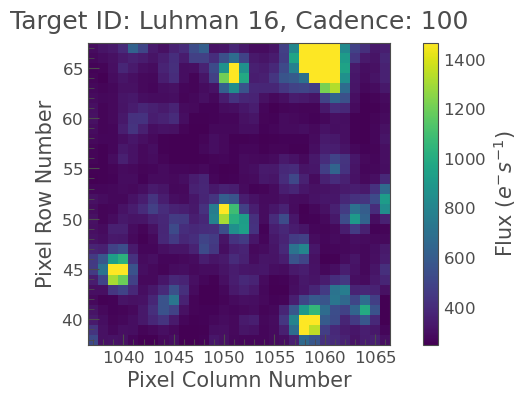

In [42]:
## Plot the full frame images
frame = 100
size = 30

%matplotlib inline

# # Sector 10
# search_result_s10 = lk.search_tesscut('Luhman 16', sector=10)
# tpfs_s10 = search_result_s10.download(cutout_size=size)
# tpfs_s10.plot(frame=frame)

# Sector 36
search_result_s36 = lk.search_tesscut('Luhman 16', sector=36)
tpfs_s36 = search_result_s36.download(cutout_size=size)
tpfs_s36.plot(frame=frame)

# Sector 37
search_result_s37 = lk.search_tesscut('Luhman 16', sector=37)
tpfs_s37 = search_result_s37.download(cutout_size=size)
tpfs_s37.plot(frame=frame)

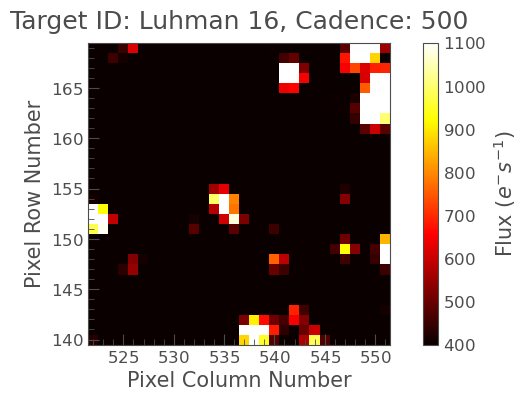

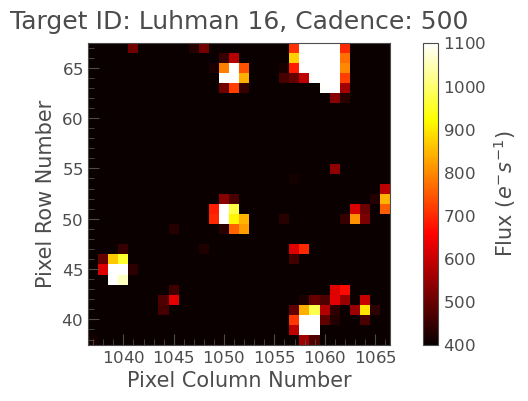

In [43]:
# plt.figure(figsize=(10,5))
save = False
# save = True
no = 500
add = 1000
%matplotlib inline

from matplotlib.colors import LogNorm
norm = LogNorm()
tpfs_s36.plot(frame=no,cmap='hot', vmin=400, vmax=1100, origin='lower', scale='linear')
if save:
    plt.savefig(homedir+'/plots/image_s36_cadenceA.pdf', bbox_inches='tight')
    plt.savefig(homedir+'/plots/image_s36_cadenceA.png', bbox_inches='tight')

    
# p = tpfs_s36.plot(frame=no+add, cmap='hot', vmin=400, vmax=1100, origin='lower', scale='linear')
tpfs_s37.plot(frame=no,cmap='hot', vmin=400, vmax=1100, origin='lower', scale='linear')
if save:
    plt.savefig(homedir+'/plots/image_s36_cadenceB.pdf', bbox_inches='tight')
    plt.savefig(homedir+'/plots/image_s36_cadenceB.png', bbox_inches='tight')